In [49]:
import numpy as np
import matplotlib.pyplot as plt
from gudhi import AlphaComplex
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, delaunay_plot_2d

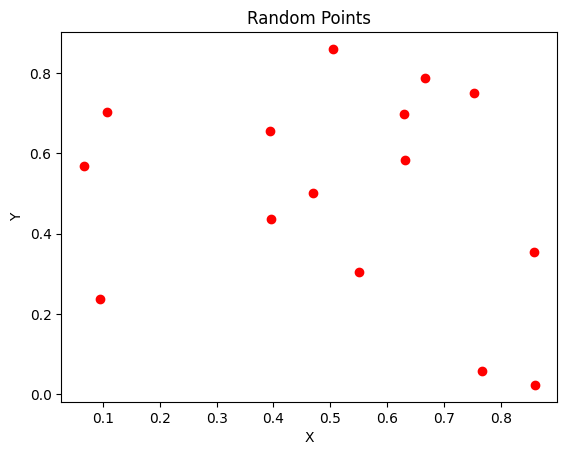

In [50]:
points = np.random.rand(15, 2)
plt.figure()
plt.scatter(points[:, 0], points[:, 1], color='red')
plt.title('Random Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [51]:
vor = Voronoi(points)

In [52]:
delaunay = Delaunay(points)

Text(0.5, 1.0, 'Delaunay Triangulation')

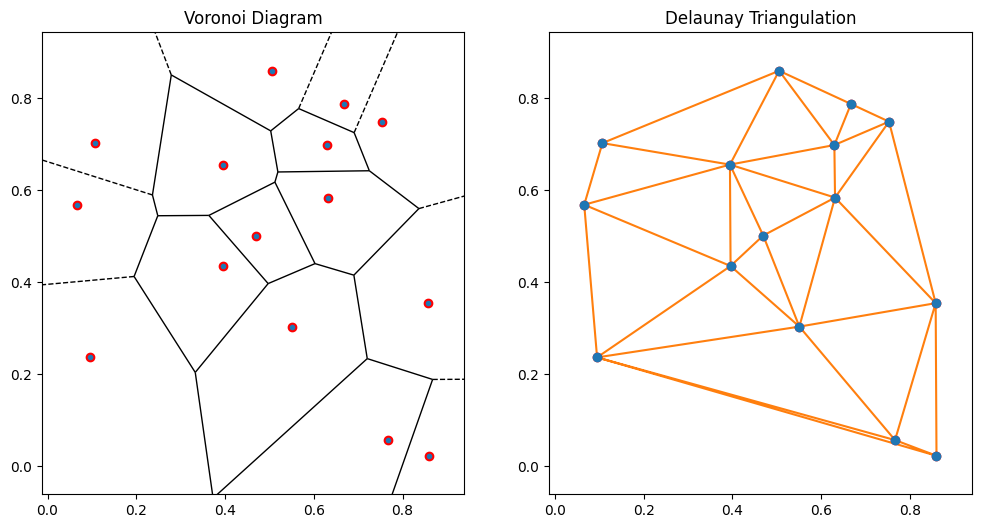

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
voronoi_plot_2d(vor, ax=ax[0], show_vertices=False)
ax[0].scatter(points[:, 0], points[:, 1], color='red')
ax[0].set_title('Voronoi Diagram')
delaunay_plot_2d(delaunay, ax=ax[1])
ax[1].scatter(points[:, 0], points[:, 1], color='red')
ax[1].set_title('Delaunay Triangulation')

<Figure size 800x800 with 0 Axes>

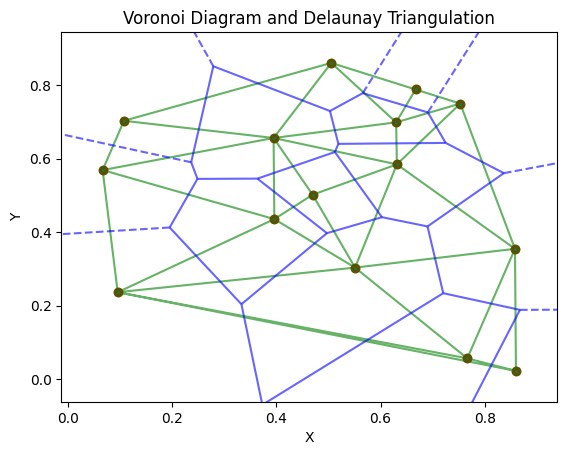

In [54]:
plt.figure(figsize=(8, 8))

voronoi_plot_2d(vor, show_vertices=False, line_colors='blue', line_width=1.5, line_alpha=0.6, point_size=2)

plt.triplot(points[:, 0], points[:, 1], delaunay.simplices, 'go-', lw=1.5, alpha=0.6)

plt.scatter(points[:, 0], points[:, 1], color='red')

plt.title('Voronoi Diagram and Delaunay Triangulation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

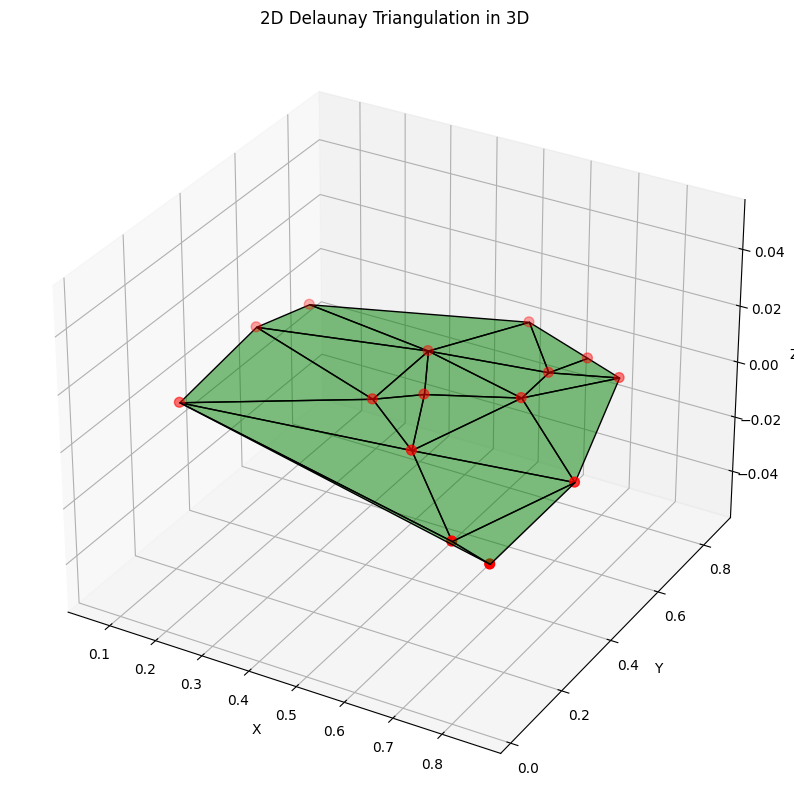

In [55]:
#seemed interesting to see if we could get any more data of patters or spatial informantion representing a 2D complex in 3D (probably not)

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
points_3d = np.hstack([points, np.zeros((points.shape[0], 1))])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], color='red', s=50)

for simplex in delaunay.simplices:
    simplex = np.append(simplex, simplex[0]) 
    triangle = points_3d[simplex]
    poly3d = [[triangle[0], triangle[1], triangle[2]]]  
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='green', edgecolors='k', linewidths=1, alpha=0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('2D Delaunay Triangulation in 3D')

plt.show()